In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/demand.csv")
data.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [3]:
data = data.dropna()

In [4]:
fig = px.scatter(data, x="Units Sold", y="Total Price",
                 size='Units Sold')
fig.show()

In [5]:
data.corr()

,ID,Store ID,Total Price,Base Price,Units Sold
ID,1.000000,0.007461,0.008473,0.018911,-0.010608
Store ID,0.007461,1.000000,-0.038315,-0.038855,-0.004369
Total Price,0.008473,-0.038315,1.000000,0.958885,-0.235625
Base Price,0.018911,-0.038855,0.958885,1.000000,-0.140022
Units Sold,-0.010608,-0.004369,-0.235625,-0.140022,1.000000


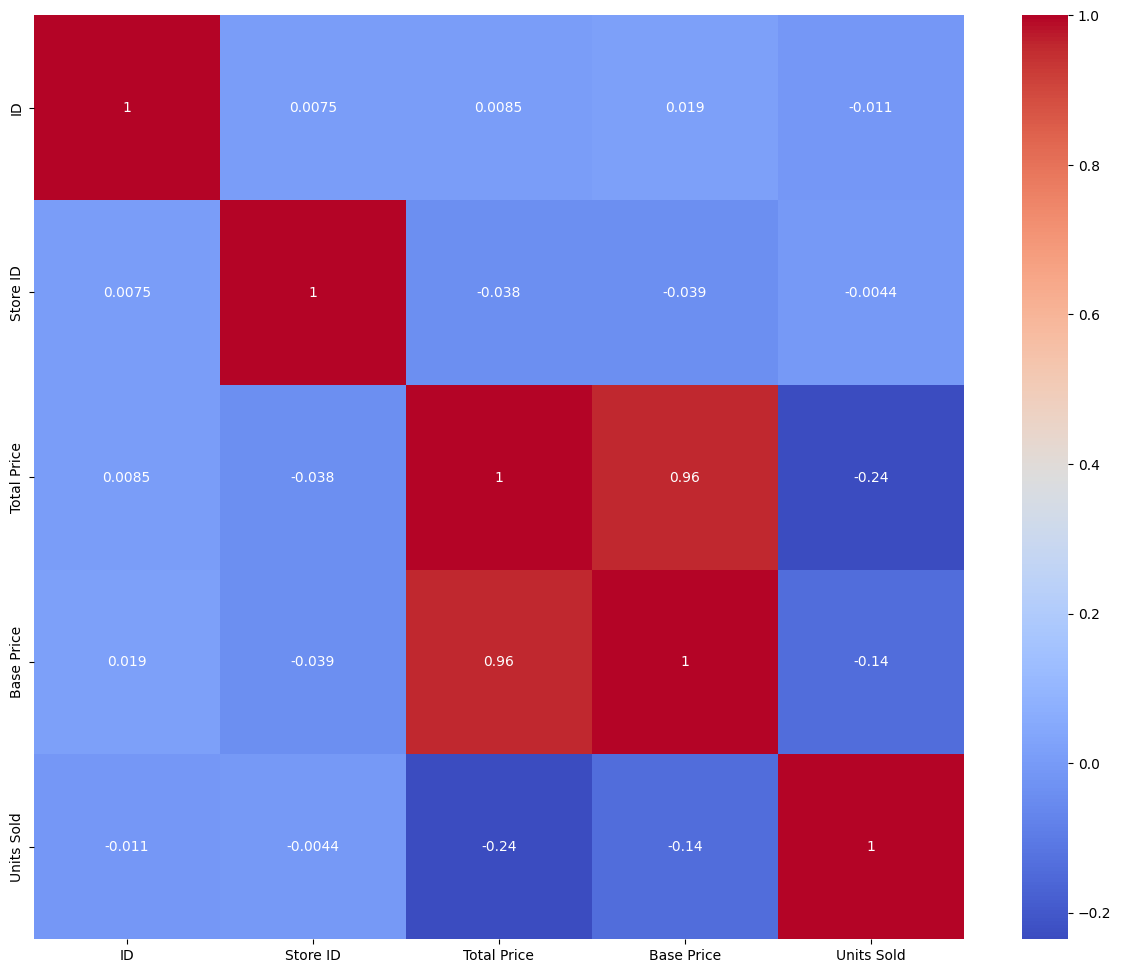

In [6]:
correlations = data.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [13]:
# Split data into train and test sets
X = data.drop(columns=['Total Price', 'ID'])  # Features
y = data['Total Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Split data into train and test sets
X = data.drop(columns=['Total Price', 'ID'])  # Features
y = data['Total Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 23.695924516724467


/tmp/ipykernel_270/3365003731.py:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



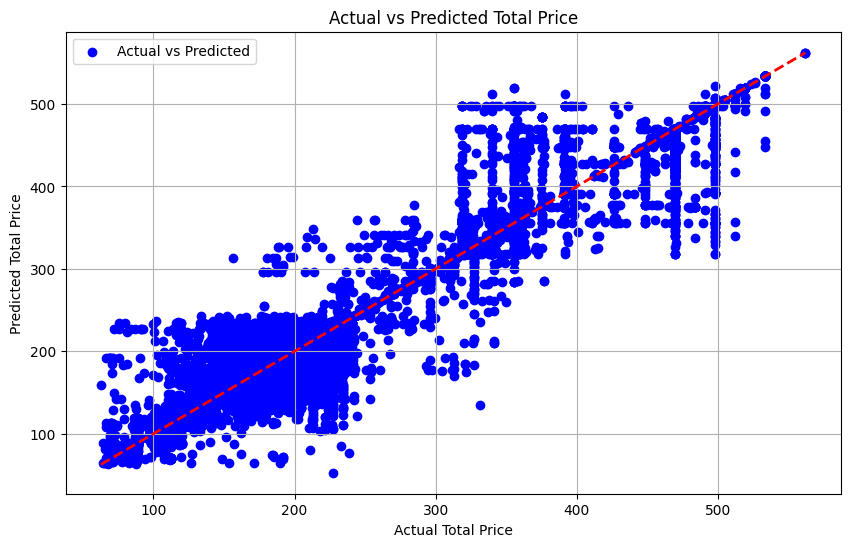

In [14]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f00183f9-5f53-4385-a647-c0cb231e91f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>